<h1> Objective </h1><br>
    You are a cab rental start-up company. You have successfully run the pilot project and
    now want to launch your cab service across the country. You have collected the
    historical data from your pilot project and now have a requirement to apply analytics for
    fare prediction. You need to design a system that predicts the fare amount for a cab ride
    in the city.

In [4]:
#Loading Required Libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fancyimpute import KNN
from ggplot import *
import seaborn as sns
import datetime
from scipy.stats import chi2_contingency

ImportError: No module named fancyimpute

In [5]:
#Setting Working Directory
os.chdir("D:\Data Science\Edwisor\Cab Fare Prediction")

WindowsError: [Error 3] The system cannot find the path specified: 'D:\\Data Science\\Edwisor\\Cab Fare Prediction'

In [64]:
os.getcwd()

'D:\\Data Science\\Edwisor\\Cab Fare Prediction'

In [65]:
#Loading the required dataset
cab_train= pd.read_csv("train_cab.csv")
cab_test= pd.read_csv("test.csv")

<h3> Understanding the data</h3><br>
Taking a look into the top 5 rows of both train and test data so that we can get some insights to it. Cheking the data types of each feature and the shape of both train and test data. Later using describe() we are looking into the min.,max, 50%, 25%, 75%, std and mean of each predictors.

In [66]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0


In [67]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [68]:
print("shape of training data is: ",cab_train.shape) #checking the number of rows and columns in training data
print("shape of test data is: ",cab_test.shape) #checking the number of rows and columns in test data

shape of training data is:  (16067, 7)
shape of test data is:  (9914, 6)


In [69]:
#Looking at the datatypes of different features in train dataset
cab_train.dtypes

fare_amount           object
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count      float64
dtype: object

In [70]:
cab_test.dtypes

pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [71]:
cab_train.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,10.578384,6.826587,10.575062,6.187087,60.844122
min,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,40.766125,401.083332,40.802437,41.366138,5345.000000


In [72]:
cab_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


<h3> Exploratory Data Analysis(EDA)</h3>

In [73]:
 #dropping NA values in datetime column
cab_train.dropna(subset= ["pickup_datetime"])  

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1.0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1.0
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2.0
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1.0
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1.0
5,12.1,2011-01-06 09:50:45 UTC,-74.000964,40.731630,-73.972892,40.758233,1.0
6,7.5,2012-11-20 20:35:00 UTC,-73.980002,40.751662,-73.973802,40.764842,1.0
7,16.5,2012-01-04 17:22:00 UTC,-73.951300,40.774138,-73.990095,40.751048,1.0
8,NaN,2012-12-03 13:10:00 UTC,-74.006462,40.726713,-73.993078,40.731628,1.0
9,8.9,2009-09-02 01:11:00 UTC,-73.980658,40.733873,-73.991540,40.758138,2.0


In [74]:
cab_train.shape

(16067, 7)

In [75]:
# converting datatype of fare amount to numeric
cab_train['fare_amount']=pd.to_numeric(cab_train['fare_amount'], errors= 'coerce')
cab_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,16042.000000,16067.000000,16067.000000,16067.000000,16067.000000,16012.000000
mean,15.015004,-72.462787,39.914725,-72.462328,39.897906,2.625070
std,430.460945,10.578384,6.826587,10.575062,6.187087,60.844122
min,-3.000000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,6.000000,-73.992156,40.734927,-73.991182,40.734651,1.000000
50%,8.500000,-73.981698,40.752603,-73.980172,40.753567,1.000000
75%,12.500000,-73.966838,40.767381,-73.963643,40.768013,2.000000
max,54343.000000,40.766125,401.083332,40.802437,41.366138,5345.000000


In [76]:
#Converting the the data type of pickup_datetime to timestamp for train dataset
cab_train['pickup_datetime']= pd.to_datetime(cab_train.pickup_datetime, errors= "coerce")

In [77]:
#Extracting pickup date, day, month, hour and minute from pickup_datetime
cab_train['pickup_date']= cab_train.pickup_datetime.dt.day
cab_train['pickup_hour']= cab_train.pickup_datetime.dt.hour
cab_train['pickup_month']= cab_train.pickup_datetime.dt.month
cab_train['pickup_weekday']= cab_train.pickup_datetime.dt.weekday
cab_train['pickup_minute']= cab_train.pickup_datetime.dt.minute

In [78]:
cab_train.dtypes

fare_amount                 float64
pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count             float64
pickup_date                 float64
pickup_hour                 float64
pickup_month                float64
pickup_weekday              float64
pickup_minute               float64
dtype: object

In [79]:
#Converting the the data type of pickup_datetime to timestamp for test dataset
cab_test['pickup_datetime']= pd.to_datetime(cab_test.pickup_datetime, errors= "coerce")

In [80]:
cab_test['pickup_date']= cab_test.pickup_datetime.dt.day
cab_test['pickup_hour']= cab_test.pickup_datetime.dt.hour
cab_test['pickup_month']= cab_test.pickup_datetime.dt.month
cab_test['pickup_weekday']= cab_test.pickup_datetime.dt.weekday
cab_test['pickup_minute']= cab_test.pickup_datetime.dt.minute

In [81]:
cab_test.dtypes

pickup_datetime      datetime64[ns]
pickup_longitude            float64
pickup_latitude             float64
dropoff_longitude           float64
dropoff_latitude            float64
passenger_count               int64
pickup_date                   int64
pickup_hour                   int64
pickup_month                  int64
pickup_weekday                int64
pickup_minute                 int64
dtype: object

In [82]:
cab_train = cab_train.drop(cab_train[cab_train['pickup_datetime'].isnull()].index, axis=0)
print(cab_train.shape)
print(cab_train['pickup_datetime'].isnull().sum())

(16066, 12)
0


In [83]:
cab_train['passenger_count'].describe()

count    16011.000000
mean         2.625171
std         60.846021
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max       5345.000000
Name: passenger_count, dtype: float64

In [84]:
#As we can see here the maximum no. of passenger count is 5345 which is not possible. so reducing the passenger count to 6 i.e
#maximum in case of SUV
cab_train= cab_train.drop(cab_train[cab_train['passenger_count']>6].index, axis=0)
print(cab_train.shape)

(16046, 12)


In [85]:
cab_train['passenger_count'].describe()

count    15991.000000
mean         1.643701
std          1.267504
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          6.000000
Name: passenger_count, dtype: float64

In [86]:
cab_train= cab_train.drop(cab_train[cab_train['passenger_count']== 0].index, axis=0)

In [87]:
cab_train.shape

(15989, 12)

In [88]:
#Removing row whose passenger count is 0.12 , which is not possible
cab_train= cab_train.drop(cab_train[cab_train['passenger_count']== 0.12].index, axis=0)

In [89]:
#removing passanger_count missing values rows
cab_train = cab_train.drop(cab_train[cab_train['passenger_count'].isnull()].index, axis=0)
print(cab_train.shape)
print(cab_train['passenger_count'].isnull().sum())

(15933, 12)
0


In [90]:
#Dealing with fare amount, deleting rows whose fare amount is -ve and 0
cab_train = cab_train.drop(cab_train[cab_train['fare_amount']< 1].index, axis=0)

In [91]:
print(cab_train.shape)

(15928, 12)


In [92]:
cab_train["fare_amount"].sort_values(ascending=False)

1015     54343.00
1072      4343.00
607        453.00
980        434.00
1335       180.00
1483       165.00
6630       128.83
14142      108.00
12349      104.67
12915       96.00
7810        95.00
9431        88.00
10077       87.30
12614       87.00
4620        85.50
14519       82.50
12437       80.75
2639        79.00
4013        77.70
13962       77.15
2013        77.00
6668        76.80
8363        76.00
10524       75.80
11019       75.33
13615       75.00
15023       73.30
1494        70.00
4118        69.70
9651        66.30
           ...   
6007         2.50
6765         2.50
6703         2.50
376          2.50
14633        2.50
1427         1.14
8             NaN
26            NaN
69            NaN
126           NaN
168           NaN
240           NaN
305           NaN
350           NaN
455           NaN
498           NaN
667           NaN
703           NaN
746           NaN
836           NaN
840           NaN
913           NaN
1123          NaN
1574          NaN
1628      

In [93]:
#Now we can see that there is a huge difference in 1st 2nd and 3rd position in decending order of fare amount
# so we will remove the rows having fare amounting more that 454 as considering them as outliers

cab_train = cab_train.drop(cab_train[cab_train["fare_amount"]> 454 ].index, axis=0)
cab_train.shape

(15926, 12)

In [94]:
# eliminating rows for which value of "fare_amount" is missing
cab_train = cab_train.drop(cab_train[cab_train['fare_amount'].isnull()].index, axis=0)
print(cab_train.shape)
print(cab_train['fare_amount'].isnull().sum())

(15902, 12)
0


In [95]:
cab_train['fare_amount'].describe()

count    15902.000000
mean        11.376356
std         10.814908
min          1.140000
25%          6.000000
50%          8.500000
75%         12.500000
max        453.000000
Name: fare_amount, dtype: float64

In [96]:
#Lattitude----(-90 to 90)
#Longitude----(-180 to 180)

# we need to drop the rows having  pickup lattitute and longitute out the range mentioned above

#train = train.drop(train[train['pickup_latitude']<-90])
cab_train[cab_train['pickup_latitude']<-90]
cab_train[cab_train['pickup_latitude']>90]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute
5686,3.3,2011-07-30 11:15:00,-73.947235,401.083332,-73.951392,40.778927,1.0,30.0,11.0,7.0,5.0,15.0


In [97]:
#Hence dropping value of >90 and <-90
cab_train = cab_train.drop((cab_train[cab_train['pickup_latitude']<-90]).index, axis=0)
cab_train = cab_train.drop((cab_train[cab_train['pickup_latitude']>90]).index, axis=0)

In [98]:
cab_train[cab_train['pickup_longitude']<-180]
cab_train[cab_train['pickup_longitude']>180]

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute


In [99]:
cab_train.shape

(15901, 12)

In [100]:
#Checkinh Missinng Value in both train and test dataset
cab_train.isnull().sum()


fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_hour          0
pickup_month         0
pickup_weekday       0
pickup_minute        0
dtype: int64

In [101]:
cab_test.isnull().sum()

pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
pickup_date          0
pickup_hour          0
pickup_month         0
pickup_weekday       0
pickup_minute        0
dtype: int64

In [102]:
#As we know that we have given pickup longitute and latitude values and same for drop. 
#So we need to calculate the distance Using the haversine formula and we will create a new variable called distance
from math import radians, cos, sin, asin, sqrt

def haversine(a):
    lon1=a[0]
    lat1=a[1]
    lon2=a[2]
    lat2=a[3]
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    
    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c =  2 * asin(sqrt(a))
    # Radius of earth in kilometers is 6371
    km = 6371* c
    return km

In [103]:
#Calculating distane and storing them in new feature named distance in Training dataset
cab_train['distance'] = cab_train[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [104]:
#Calculating distane and storing them in new feature named distance in Test dataset
cab_test['distance'] = cab_test[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']].apply(haversine,axis=1)

In [105]:
cab_train.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1.0,15.0,17.0,6.0,0.0,26.0,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1.0,5.0,16.0,1.0,1.0,52.0,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2.0,18.0,0.0,8.0,3.0,35.0,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1.0,21.0,4.0,4.0,5.0,30.0,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1.0,9.0,7.0,3.0,1.0,51.0,1.999157


In [106]:
cab_test.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,27,13,1,1,8,2.323259
1,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,27,13,1,1,8,2.425353
2,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,8,11,10,5,53,0.618628
3,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,1,21,12,5,12,1.961033
4,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,1,21,12,5,12,5.387301


In [107]:
##finding decending order of fare to get to know whether the outliers are presented or not
cab_train['distance'].sort_values(ascending=False)

9147     8667.542104
8647     8667.497512
2397     8667.454421
472      8667.304968
11653    8666.701504
13340    8666.613646
10215    8666.584706
4597     8666.566030
10458    8665.976222
10672    8665.702390
10488    8665.555634
1260     8665.268588
4278     8665.223767
6188     8664.191488
12983    8664.131808
6302     8663.039123
12705    8661.362152
14197    8657.136619
15783    8656.714168
15749    6028.926779
2280     6026.494216
5864     5420.988959
7014     4447.086698
10710     129.950482
14536     129.560455
11619     127.509261
12228     123.561157
5663      101.094619
1684       99.771579
3075       97.985088
            ...     
7684        0.000000
4298        0.000000
13143       0.000000
3128        0.000000
8645        0.000000
8377        0.000000
4240        0.000000
2447        0.000000
4367        0.000000
11565       0.000000
13081       0.000000
13062       0.000000
4454        0.000000
13013       0.000000
13015       0.000000
808         0.000000
6462        0

In [108]:
#As we can see that top 23 values in the distance variables are very high It means more than 8000 Kms distance they have 
#travelled Also just after 23rd value from the top, the distance goes down to 127, which means these values are showing some
#outliers We need to remove these values

###we will remove the rows whose distance value is zero

cab_train = cab_train.drop(cab_train[cab_train['distance']== 0].index, axis=0)
cab_train.shape

(15447, 13)

In [109]:
#We will remove the rows whose distance values is very high which is more than 129kms
cab_train = cab_train.drop(cab_train[cab_train['distance'] > 130 ].index, axis=0)
cab_train.shape

(15424, 13)

In [110]:
cab_train['distance'].isnull().sum()

0

In [111]:
#Droping feature related to pickup and dropoff
drop = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
cab_train = cab_train.drop(drop, axis = 1)

In [112]:
cab_train.head()

,fare_amount,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,4.5,1.0,15.0,17.0,6.0,0.0,26.0,1.030764
1,16.9,1.0,5.0,16.0,1.0,1.0,52.0,8.450134
2,5.7,2.0,18.0,0.0,8.0,3.0,35.0,1.389525
3,7.7,1.0,21.0,4.0,4.0,5.0,30.0,2.799270
4,5.3,1.0,9.0,7.0,3.0,1.0,51.0,1.999157


In [113]:
cab_train.dtypes

fare_amount        float64
passenger_count    float64
pickup_date        float64
pickup_hour        float64
pickup_month       float64
pickup_weekday     float64
pickup_minute      float64
distance           float64
dtype: object

In [114]:
cab_train['passenger_count'] = cab_train['passenger_count'].astype('category')
cab_train['pickup_date'] = cab_train['pickup_date'].astype('int64')
cab_train['pickup_month'] = cab_train['pickup_month'].astype('int64')
cab_train['pickup_weekday'] = cab_train['pickup_weekday'].astype('int64')
cab_train['pickup_minute'] = cab_train['pickup_minute'].astype('int64')
cab_train['pickup_hour'] = cab_train['pickup_hour'].astype('int64')

In [115]:
#dropping features from test data
drop_test = ['pickup_datetime', 'pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude']
cab_test = cab_test.drop(drop_test, axis = 1)

In [116]:
cab_test.head()

,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance
0,1,27,13,1,1,8,2.323259
1,1,27,13,1,1,8,2.425353
2,1,8,11,10,5,53,0.618628
3,1,1,21,12,5,12,1.961033
4,1,1,21,12,5,12,5.387301


In [117]:
cab_test.dtypes

passenger_count      int64
pickup_date          int64
pickup_hour          int64
pickup_month         int64
pickup_weekday       int64
pickup_minute        int64
distance           float64
dtype: object

<h3> Correlational Analysis </h3>

In [118]:
################## Feature Selection #######################
#Correlational Analysis
#Correlational Plot
cnames=['pickup_date','pickup_hour','pickup_month','pickup_minute','distance_travelled','pickup_weekday','fare_amount']
cab_data_corr= cab_train.loc[:, cnames]

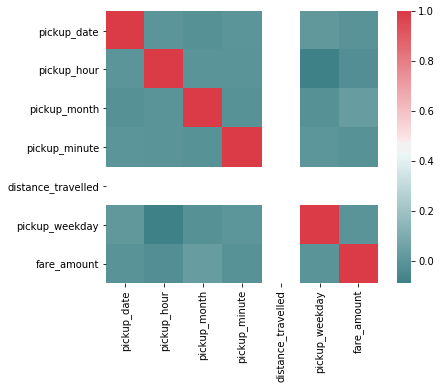

In [119]:
#Setting the height and width of the plot
f, ax= plt.subplots(figsize=(7,5))
#generating correlation matrix
corr= cab_data_corr.corr()
#Ploting using seaborn library
sns.heatmap(corr, mask= np.zeros_like(corr, dtype= np.bool), cmap= sns.diverging_palette(200, 10, as_cmap= True),
           square= True, ax=ax)

<h3> Feature Scaling </h3>

fare_amount


C:\Users\abhij\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


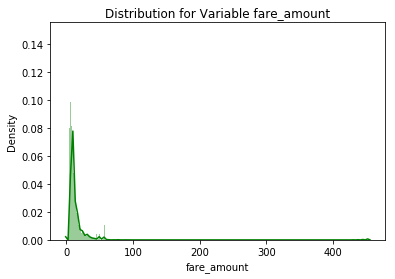

distance


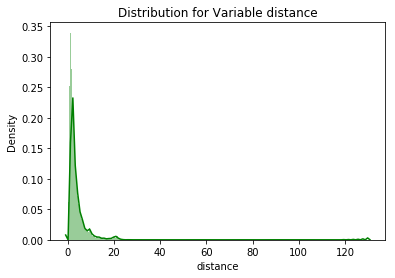

In [120]:
#Checking the distribution of fare_amount and distance in training dataset-

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(cab_train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

In [121]:
# We can clearly see that fare_amount and distance both are right skewed apply log transform to reduce the skewness in train dataset
cab_train['fare_amount'] = np.log1p(cab_train['fare_amount'])

cab_train['distance'] = np.log1p(cab_train['distance'])

fare_amount


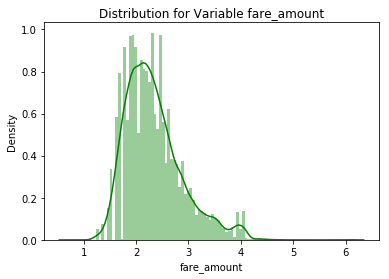

distance


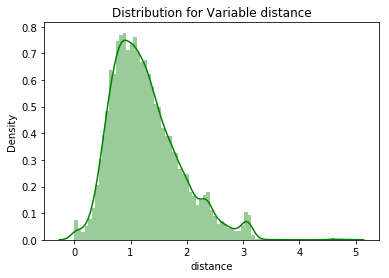

In [122]:
#Checking the distribution of fare_amount and distance in training dataset after log transform

for i in ['fare_amount', 'distance']:
    print(i)
    sns.distplot(cab_train[i],bins='auto',color='green')
    plt.title("Distribution for Variable "+i)
    plt.ylabel("Density")
    plt.show()

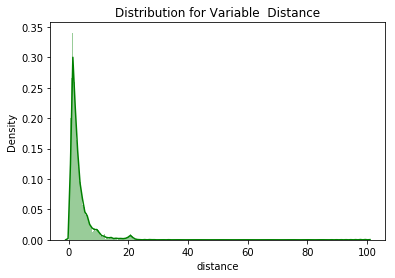

In [123]:
#Checking the distribution of distance in training datase
sns.distplot(cab_test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable  Distance")
plt.ylabel("Density")
plt.show()

In [124]:
#We can clearly see that distance is right skewed apply log transform to reduce the skewness in test dataset
cab_test['distance'] = np.log1p(cab_test['distance'])

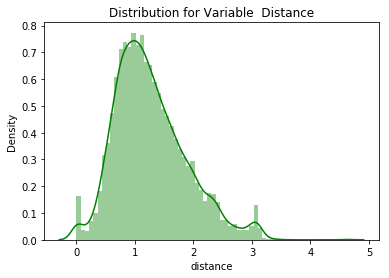

In [125]:
#Checking the distribution of distance in test dataset after log transform

sns.distplot(cab_test['distance'],bins='auto',color='green')
plt.title("Distribution for Variable  Distance")
plt.ylabel("Density")
plt.show()

In [126]:
#Mape Function
def MAPE(y, yhat): 
    mape = np.mean(np.abs((y - yhat) / y))*100
    print("MAPE:", mape)

#RMSE Function
def RMSE(y_test,yhat):
    mse = np.mean((y_test-yhat)**2)
    print("Mean Square : ",mse)
    rmse=np.sqrt(mse)
    print("Root Mean Square : ",rmse)

In [157]:
# Splitting the data into training set and test set
from sklearn.model_selection import train_test_split
train, test = train_test_split(cab_train, test_size=0.2)

<h3> Linear Regression</h3>

In [158]:
####################### LINEAR REGRESSION ##################
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(train.iloc[:, 1:8], train.iloc[:, 0])
predictions_LR= regressor.predict(test.iloc[:, 1:8])


<h3> Decision Tree </h3>

In [162]:
########################### Decision Tree ############
from sklearn.tree import DecisionTreeRegressor
regressor_DT = DecisionTreeRegressor(max_depth=10).fit(train.iloc[:,1:8], train.iloc[:,0])
predictions_DT = regressor_DT.predict(test.iloc[:,1:8])

<h3> Random Forest </h3>

In [161]:
####################### Random Forest #########################
from sklearn.ensemble import RandomForestRegressor
regressor_RF = RandomForestRegressor(n_estimators = 200, max_depth= 7).fit(train.iloc[:,1:8], train.iloc[:,0])
RF_Predictions = regressor_RF.predict(test.iloc[:,1:8])

<h3> Model Evaluation </h3>

In [163]:
#Mape for Linear Regression
MAPE(test.iloc[:,0],predictions_LR)
RMSE(test.iloc[:,0],predictions_LR)

MAPE: 8.06334883804959
Mean Square :  0.08547478254297824
Root Mean Square :  0.2923607062226014


In [165]:
#calculate R^2 for Linear Regression Model
r2_score(test.iloc[:,0], predictions_LR)

0.7196094035065019

In [164]:
#Mape for Decision Tree
MAPE(test.iloc[:,0],predictions_DT)
RMSE(test.iloc[:,0],predictions_DT)

MAPE: 8.480695528000217
Mean Square :  0.08877278102570765
Root Mean Square :  0.29794761456623153


In [166]:
#calculate R^2 for Decision Tree Model
r2_score(test.iloc[:,0], predictions_DT)

0.7087906832442755

In [167]:
#Mape for Random Forest
MAPE(test.iloc[:,0],RF_Predictions)
RMSE(test.iloc[:,0],RF_Predictions)

MAPE: 7.823785670752574
Mean Square :  0.07214469237686673
Root Mean Square :  0.2685976403039809


In [168]:
#calculate R^2 for Random Forest Model
r2_score(test.iloc[:,0], RF_Predictions)

0.7633372940233193

<h3> Applying Grid Search to Random Forest for hyper parameter tuning </h3>

In [169]:
# As we know the given problem is a regression so we are considering two performance metrics:-
#1) MAPE (2) RMSE
# Suppose Predicted cab fare_amount is 100 and the actual is 102, then here we will not see the difference
#in error i.e 2 but we will calculate the percentage error which is 2%. Again, if the predicted fare_amount
# is 10 instead of 12, error difference is again 2 but the percentage error is 20% .So we will be considering
# MAPE as our error metrics
#As we can see clearly see the value of both the Error Metrics i.e MAPE and RMSE both are minimum for Random Forest model
# and value of R-square is also higher for Random Forest. So Choosing Random Forest as our Final Model and 
#applying grid search to find the best value of hyper-parameters
from sklearn.model_selection import GridSearchCV
parameters= [{'max_depth': [2,5,7,8,10], 'n_estimators' : [10, 100, 200, 300, 400, 500]}]

grid_search= GridSearchCV(estimator = regressor_RF, param_grid= parameters, cv= 5, n_jobs= -1)
grid_search= grid_search.fit(train.iloc[:,1:8], train.iloc[:, 0])

In [170]:
#Calculating the best value of the provided hyper-parameter
best_param= grid_search.best_params_

In [171]:
best_param

{'max_depth': 7, 'n_estimators': 200}

In [172]:
print(grid_search.best_score_)

0.7811608772639813


<h3> Applying K Fold Cross Validation </h3>

In [88]:
#Applying K Fold Cross Validation
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= regressor_RF, X= train.iloc[:,1:8], y= train.iloc[:,0], cv= 10)
accuracies.mean()


0.7707549922567212

In [173]:
#Applying model on test data
prediction_test_RF= regressor_RF.predict(cab_test)

In [174]:
prediction_test_RF

array([2.27772156, 2.33158788, 1.71582102, ..., 3.9524591 , 3.09286109,
       1.9239356 ])

In [175]:
cab_test['Predicted_fare'] = prediction_test_RF

In [176]:
cab_test.head()

,passenger_count,pickup_date,pickup_hour,pickup_month,pickup_weekday,pickup_minute,distance,Predicted_fare
0,1,27,13,1,1,8,1.200946,2.277722
1,1,27,13,1,1,8,1.231205,2.331588
2,1,8,11,10,5,53,0.481579,1.715821
3,1,1,21,12,5,12,1.085538,2.176833
4,1,1,21,12,5,12,1.854312,2.724361


In [87]:
cab_test.to_csv('Cab_fare_Prediction_output.csv', index= False)